<a href="https://colab.research.google.com/github/douyang/echonet-function-evaluation/blob/master/Calculations_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Image Samples

In [1]:
from google.colab.patches import cv2_imshow
import os
import cv2
import numpy as np

In [2]:
path = "/content/120070335_803023843853524_3220986397143345552_n.png"

#Get all of the coordinates of the edge of the segmented mask(Red Version)

[]
Number of points:  0


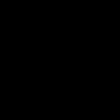

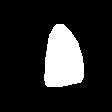

In [3]:
# read image
img = cv2.imread(path)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# set lower and upper bounds on blue color
lower = (100,0,0)
upper = (255,0,0)

# threshold and invert so hexagon is white on black background
thresh = cv2.inRange(rgb, lower, upper)

# get contours
result = np.zeros_like(thresh)
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]

points = []
# list contour points
for pt in contours:
    for i in pt:
      for coord in i:
        points.append(coord.tolist())
print(points)

print("Number of points: ", len(points))
# show thresh and contour  
cv2_imshow(thresh)
cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()


# Blue Version

[[56, 24], [55, 25], [54, 26], [53, 27], [53, 28], [52, 29], [52, 30], [51, 31], [51, 32], [50, 33], [49, 34], [49, 35], [49, 36], [49, 37], [48, 38], [48, 39], [48, 40], [48, 41], [48, 42], [48, 43], [47, 44], [47, 45], [47, 46], [47, 47], [47, 48], [47, 49], [47, 50], [46, 51], [46, 52], [46, 53], [46, 54], [46, 55], [46, 56], [45, 57], [45, 58], [45, 59], [45, 60], [45, 61], [45, 62], [45, 63], [45, 64], [45, 65], [45, 66], [45, 67], [45, 68], [45, 69], [45, 70], [45, 71], [45, 72], [45, 73], [44, 74], [44, 75], [44, 76], [44, 77], [44, 78], [44, 79], [44, 80], [45, 81], [45, 82], [45, 83], [45, 84], [46, 85], [47, 86], [48, 86], [49, 86], [50, 86], [51, 86], [52, 86], [53, 86], [54, 86], [55, 86], [56, 86], [57, 86], [58, 86], [59, 86], [60, 86], [61, 86], [62, 86], [63, 85], [64, 85], [65, 85], [66, 85], [67, 85], [68, 84], [69, 84], [70, 84], [71, 84], [72, 83], [73, 83], [74, 83], [75, 83], [76, 83], [77, 82], [78, 82], [79, 82], [80, 82], [81, 81], [81, 80], [82, 79], [82, 78],

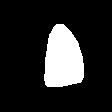

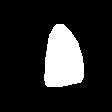

In [4]:
# read image
img = cv2.imread(path)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# set lower and upper bounds on blue color
lower = (0,0,100)
upper = (255,255,255)

# threshold and invert so hexagon is white on black background
thresh = cv2.inRange(rgb, lower, upper)


# get contours
result = np.zeros_like(thresh)
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]

points = []
# list contour points
for pt in contours:
    for i in pt:
      for coord in i:
        points.append(coord.tolist())
print(points)

print("Number of points: ", len(points))
# show thresh and contour  
cv2_imshow(thresh)
cv2_imshow(img)
# cv2_imshow(opening)
# cv2_imshow(closing)

cv2.waitKey(0)
cv2.destroyAllWindows()


# Mask from binary mask

[[56, 24], [55, 25], [54, 26], [53, 27], [53, 28], [52, 29], [52, 30], [51, 31], [51, 32], [50, 33], [49, 34], [49, 35], [49, 36], [49, 37], [48, 38], [48, 39], [48, 40], [48, 41], [48, 42], [48, 43], [47, 44], [47, 45], [47, 46], [47, 47], [47, 48], [47, 49], [47, 50], [46, 51], [46, 52], [46, 53], [46, 54], [46, 55], [46, 56], [45, 57], [45, 58], [45, 59], [45, 60], [45, 61], [45, 62], [45, 63], [45, 64], [45, 65], [45, 66], [45, 67], [45, 68], [45, 69], [45, 70], [45, 71], [45, 72], [45, 73], [44, 74], [44, 75], [44, 76], [44, 77], [44, 78], [44, 79], [44, 80], [45, 81], [45, 82], [45, 83], [45, 84], [46, 85], [47, 86], [48, 86], [49, 86], [50, 86], [51, 86], [52, 86], [53, 86], [54, 86], [55, 86], [56, 86], [57, 86], [58, 86], [59, 86], [60, 86], [61, 86], [62, 86], [63, 85], [64, 85], [65, 85], [66, 85], [67, 85], [68, 84], [69, 84], [70, 84], [71, 84], [72, 83], [73, 83], [74, 83], [75, 83], [76, 83], [77, 82], [78, 82], [79, 82], [80, 82], [81, 81], [81, 80], [82, 79], [82, 78],

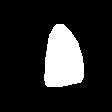

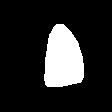

In [5]:
# read image
img = cv2.imread(path)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# set lower and upper bounds on blue color
lower = (200,200,200)
upper = (255,255,255)

# threshold and invert so hexagon is white on black background
thresh = cv2.inRange(rgb, lower, upper)

# get contours
result = np.zeros_like(thresh)
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]

points = []
# list contour points
for pt in contours:
    for i in pt:
      for coord in i:
        points.append(coord.tolist())
print(points)

print("Number of points: ", len(points))
# show thresh and contour  
cv2_imshow(img)
cv2_imshow(thresh)

# cv2_imshow(opening)
# cv2_imshow(closing)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
pointGroups = []
index = 0
subgroup = [points[0]]

for i in range(len(points) - 1):
  prevPoint = points[i]
  currentPoint = points[i+1]

  if abs(prevPoint[0]-currentPoint[0]) <= 1 and abs(prevPoint[1]-currentPoint[1]) <= 1:
    subgroup.append(currentPoint)
  else:
    pointGroups.append(subgroup[:])
    subgroup = [currentPoint]

pointGroups.append(subgroup)

mainPointGroup = []
maxPointGroupSize = 0

for group in pointGroups:
  if len(group) > maxPointGroupSize:
    maxPointGroup = group
    maxPointGroupSize = len(group)

points = maxPointGroup[:]

# Top 5 and Bottom 5 Analysis(Heuristic 2)


In [7]:
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

# Minimum and Maximum Y Coord
maxY = max(points, key = lambda point: point[1])
minY = min(points, key = lambda point: point[1])

# MinY and MaxY With the limits
minYWith5 = minY[1] + 5
maxYWithout5 = maxY[1] - 15

# Creating these arrays
minYWith5Arr = []
maxYWithout5Arr = []

# Finding these points
for point in points:
  if point[1] == minYWith5:
    minYWith5Arr.append(point)
  if point[1] == maxYWithout5:
    maxYWithout5Arr.append(point)

# Average X Coordinates
averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)
slope = getSlope([averageTopX, minYWith5], [averageBottomX, maxYWithout5])

if slope > 0:
  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)
else:
  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)


# Creating these arrays
averageTopXArr = []
averageBottomXArr = []

# Finding these points
condition = True
if slope > 0:
  while condition and averageTopX <= minYWith5Arr[-1][0] and averageBottomX >= maxYWithout5Arr[0][0]:
    for point in points:
      if point[0] == averageTopX:
        averageTopXArr.append(point)
      if point[0] == averageBottomX:
        averageBottomXArr.append(point)
    if len(averageTopXArr) > 0 and len(averageBottomXArr):
      condition = False
    if len(averageTopXArr) == 0:
      averageTopX += 1
    if len(averageBottomXArr) == 0:
      averageBottomXArr -= 1
else:
  while condition and averageTopX >= minYWith5Arr[0][0] and averageBottomX <= maxYWithout5Arr[-1][0]:
    for point in points:
      if point[0] == averageTopX:
        averageTopXArr.append(point)
      if point[0] == averageBottomX:
        averageBottomXArr.append(point)
    if len(averageTopXArr) > 0 and len(averageBottomXArr):
      condition = False
    if len(averageTopXArr) == 0:
      averageTopX -= 1
    if len(averageBottomXArr) == 0:
      averageBottomXArr += 1

# Sorting Arrs
averageTopXArr.sort(key=lambda point: point[1])
averageBottomXArr.sort(key=lambda point: point[1])
averageBottomXArr.reverse()


# Finding Min Top and Max Bottom
TopCoord = averageTopXArr[0]
BottomCoord = averageBottomXArr[0]

x1, y1 = TopCoord
x2, y2 = BottomCoord

if (x1 + y1) > (x2 + y2):
  x1, y1, x2, y2 = x2, y2, x1, y1

# Calculate Weighted Average

In [8]:
import math

# parallel_dist = distance/21

weighted_avg = []

for n in range(1, 21, 1):
  x_perpendicular = (((n*x1)+(21-n)*(x2))/21)
  y_perpendicular = (((n*y1)+(21-n)*(y2))/21)
  weighted_avg.append([x_perpendicular, y_perpendicular])

print(weighted_avg)

[[64.71428571428571, 82.0952380952381], [64.42857142857143, 79.19047619047619], [64.14285714285714, 76.28571428571429], [63.857142857142854, 73.38095238095238], [63.57142857142857, 70.47619047619048], [63.285714285714285, 67.57142857142857], [63.0, 64.66666666666667], [62.714285714285715, 61.76190476190476], [62.42857142857143, 58.857142857142854], [62.142857142857146, 55.95238095238095], [61.857142857142854, 53.04761904761905], [61.57142857142857, 50.142857142857146], [61.285714285714285, 47.23809523809524], [61.0, 44.333333333333336], [60.714285714285715, 41.42857142857143], [60.42857142857143, 38.523809523809526], [60.142857142857146, 35.61904761904762], [59.857142857142854, 32.714285714285715], [59.57142857142857, 29.80952380952381], [59.285714285714285, 26.904761904761905]]


# Find All Mask White points

In [9]:
p1Index = points.index([x1, y1])
p2Index = points.index([x2, y2])

lowerIndex = min(p1Index, p2Index)
higherIndex = max(p1Index, p2Index)

higherIntercept = points[lowerIndex:higherIndex]
lowerIntercept = points[higherIndex:] + points[:lowerIndex]

if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
  lowerIntercept, higherIntercept = higherIntercept, lowerIntercept

print(lowerIntercept)
print(higherIntercept)

[[65, 85], [66, 85], [67, 85], [68, 84], [69, 84], [70, 84], [71, 84], [72, 83], [73, 83], [74, 83], [75, 83], [76, 83], [77, 82], [78, 82], [79, 82], [80, 82], [81, 81], [81, 80], [82, 79], [82, 78], [83, 77], [83, 76], [83, 75], [83, 74], [83, 73], [83, 72], [83, 71], [83, 70], [83, 69], [83, 68], [83, 67], [83, 66], [83, 65], [83, 64], [83, 63], [82, 62], [82, 61], [82, 60], [82, 59], [82, 58], [82, 57], [82, 56], [81, 55], [81, 54], [81, 53], [80, 52], [80, 51], [80, 50], [79, 49], [79, 48], [79, 47], [78, 46], [78, 45], [78, 44], [78, 43], [77, 42], [77, 41], [76, 40], [75, 39], [75, 38], [74, 37], [73, 36], [73, 35], [72, 34], [71, 33], [71, 32], [70, 31], [69, 30], [68, 29], [67, 28], [66, 27], [65, 26], [64, 25], [63, 24], [62, 24], [61, 24], [60, 24]]
[[59, 24], [58, 24], [57, 24], [56, 24], [55, 25], [54, 26], [53, 27], [53, 28], [52, 29], [52, 30], [51, 31], [51, 32], [50, 33], [49, 34], [49, 35], [49, 36], [49, 37], [48, 38], [48, 39], [48, 40], [48, 41], [48, 42], [48, 43]

# Split points into 2

In [10]:
# Indexing
lowerIndex = 0
higherIndex = 0

# Make sure its from top to bottom direction
if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
  weighted_avg = weighted_avg[::-1]

# Make sure its from top to bottom direction
if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
    higherIntercept = higherIntercept[::-1]

# Make sure its from top to bottom direction
if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
    lowerIntercept = lowerIntercept[::-1]

higherInterceptAveragePoints = []
lowerInterceptAveragePoints = []

lowerIndex = 0
higherIndex = 0

slope = getSlope([x1, y1], [x2, y2])
try:
  perp_slope = -1/slope
except:
  perp_slope = 10000

for averagePoint in weighted_avg:
  try:
    condition = True
    while condition:
      point = higherIntercept[higherIndex]
      
      if averagePoint[0] <= point[0] and slope > 0:
        averagePoint[0] = point[0] + 1
      

      new_slope = getSlope(point, averagePoint)
      higherIndex += 1
      
      print(point, averagePoint, new_slope, perp_slope, slope)
      if slope>0 and new_slope<perp_slope and (new_slope<slope) and (new_slope != -333):
        higherInterceptAveragePoints.append(point)
        condition = False
      elif slope<0 and new_slope<perp_slope and new_slope>slope:
        higherInterceptAveragePoints.append(point)
        condition = False
      
  except:
    higherInterceptAveragePoints.append(higherIntercept[higherIndex - 1])

for averagePoint in weighted_avg:
  try:
    condition = True
    while condition:
      point = lowerIntercept[lowerIndex]
      new_slope = getSlope(point, averagePoint)
      lowerIndex += 1

      if slope>0 and new_slope>perp_slope and (new_slope<slope) and (new_slope != -333):
        lowerInterceptAveragePoints.append(point)
        condition = False
      elif slope<0 and new_slope>perp_slope and new_slope>slope:
        lowerInterceptAveragePoints.append(point)
        condition = False
  except:
    lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex - 1])

print(lowerInterceptAveragePoints)
print(higherInterceptAveragePoints)


[59, 24] [59.285714285714285, 26.904761904761905] 10.166666666666703 -0.09836065573770493 10.166666666666666
[58, 24] [59.285714285714285, 26.904761904761905] 2.2592592592592613 -0.09836065573770493 10.166666666666666
[57, 24] [59.285714285714285, 26.904761904761905] 1.2708333333333341 -0.09836065573770493 10.166666666666666
[56, 24] [59.285714285714285, 26.904761904761905] 0.8840579710144931 -0.09836065573770493 10.166666666666666
[55, 25] [59.285714285714285, 26.904761904761905] 0.44444444444444464 -0.09836065573770493 10.166666666666666
[54, 26] [59.285714285714285, 26.904761904761905] 0.17117117117117125 -0.09836065573770493 10.166666666666666
[53, 27] [59.285714285714285, 26.904761904761905] -0.0151515151515151 -0.09836065573770493 10.166666666666666
[53, 28] [59.285714285714285, 26.904761904761905] -0.17424242424242423 -0.09836065573770493 10.166666666666666
[52, 29] [59.57142857142857, 29.80952380952381] 0.1069182389937108 -0.09836065573770493 10.166666666666666
[52, 30] [59.571

In [11]:
# Calculate perpendicular slope
try:
  perp_slope = -1/slope
except:
  perp_slope = 10000

# Indexing
lowerIndex = 0
higherIndex = 0

# Make sure its from top to bottom direction
if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
  weighted_avg = weighted_avg[::-1]

# Make sure its from top to bottom direction
if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
    higherIntercept = higherIntercept[::-1]

# Make sure its from top to bottom direction
if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
    lowerIntercept = lowerIntercept[::-1]

higherInterceptAveragePoints = []
lowerInterceptAveragePoints = []

for averagePoint in weighted_avg:
  try:
    condition = True
    while condition:
      point = higherIntercept[higherIndex]
      if higherIndex == 0:
        prev_point = [x1, y1]
      else:
        prev_point = higherIntercept[higherIndex-1]
      
      new_slope = getSlope(point, averagePoint)
      prev_slope =  getSlope(prev_point, averagePoint)
      betweenCond = ((point[0] <= averagePoint[0] and prev_point[0] >= averagePoint[0]) or (point[0] >= averagePoint[0] and prev_point[0] <= averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope) 


      if ((new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)) and (not betweenCond):
        
        higherInterceptAveragePoints.append(point)
        condition = False
      elif perp_slope == 10000 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
        higherInterceptAveragePoints.append(point)
        condition = False
      higherIndex += 1
  except:
    higherInterceptAveragePoints.append(higherIntercept[higherIndex - 1])

for averagePoint in weighted_avg:
  try:
    condition = True
    while condition:
      point = lowerIntercept[lowerIndex]
      if lowerIndex == 0:
        prev_point = [x1, y1]
      else:
        prev_point = lowerIntercept[lowerIndex-1]

      new_slope = getSlope(point, averagePoint)
      prev_slope =  getSlope(prev_point, averagePoint)
      betweenCond = ((point[0] <= averagePoint[0] and prev_point[0] >= averagePoint[0]) or (point[0] >= averagePoint[0] and prev_point[0] <= averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope) 

      print(point, prev_point, averagePoint, new_slope, prev_slope, perp_slope)
      if ((new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)) and (not betweenCond):
        lowerInterceptAveragePoints.append(point)
        condition = False
      elif perp_slope == 10000 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
        lowerInterceptAveragePoints.append(point)
        condition = False

      print("here")
      lowerIndex += 1
  except:
    lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex - 1])


for point in higherInterceptAveragePoints:
  print(point)

print("\n\n")
for point in lowerInterceptAveragePoints:
  print(point)

[60, 24] [59, 24] [59.285714285714285, 26.904761904761905] -4.066666666666661 10.166666666666703 -0.09836065573770493
here
[61, 24] [60, 24] [59.57142857142857, 29.80952380952381] -4.066666666666661 -13.555555555555493 -0.09836065573770493
here
[62, 24] [61, 24] [59.57142857142857, 29.80952380952381] -2.392156862745096 -4.066666666666661 -0.09836065573770493
here
[63, 24] [62, 24] [59.57142857142857, 29.80952380952381] -1.6944444444444435 -2.392156862745096 -0.09836065573770493
here
[64, 25] [63, 24] [59.57142857142857, 29.80952380952381] -1.0860215053763438 -1.6944444444444435 -0.09836065573770493
here
[65, 26] [64, 25] [59.57142857142857, 29.80952380952381] -0.7017543859649121 -1.0860215053763438 -0.09836065573770493
here
[66, 27] [65, 26] [59.57142857142857, 29.80952380952381] -0.437037037037037 -0.7017543859649121 -0.09836065573770493
here
[67, 28] [66, 27] [59.57142857142857, 29.80952380952381] -0.2435897435897436 -0.437037037037037 -0.09836065573770493
here
[68, 29] [67, 28] [59.

In [12]:
# i = 0

# x1, y1 = lowerIntercept[i]
# x2, y2 = higherIntercept[i]


# slope = getSlope([x1, y1], [x2, y2])

# p1Index = points.index([x1, y1])
# p2Index = points.index([x2, y2])

# lowerIndex = min(p1Index, p2Index)
# higherIndex = max(p1Index, p2Index)

# higherInterceptPoints = points[lowerIndex:higherIndex]
# lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

# if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
#   lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

# weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, 20)
# lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)

59 24
65 85
[[59.285714285714285, 26.904761904761905], [59.57142857142857, 29.80952380952381], [59.857142857142854, 32.714285714285715], [60.142857142857146, 35.61904761904762], [60.42857142857143, 38.523809523809526], [60.714285714285715, 41.42857142857143], [61.0, 44.333333333333336], [61.285714285714285, 47.23809523809524], [61.57142857142857, 50.142857142857146], [61.857142857142854, 53.04761904761905], [62.142857142857146, 55.95238095238095], [62.42857142857143, 58.857142857142854], [62.714285714285715, 61.76190476190476], [63.0, 64.66666666666667], [63.285714285714285, 67.57142857142857], [63.57142857142857, 70.47619047619048], [63.857142857142854, 73.38095238095238], [64.14285714285714, 76.28571428571429], [64.42857142857143, 79.19047619047619], [64.71428571428571, 82.0952380952381]]


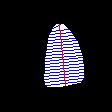

In [13]:
image = cv2.imread(path) 

height = image.shape[0]
width = image.shape[1]


# for point in weighted_avg:
#   cv2.circle(image,(int(point[0]), int(point[1])), 1, (0,255,0), -1)
  # if point[0] <50:
  #   print(point)

print(x1, y1)
print(x2, y2)
print(weighted_avg)
for i in range(len(lowerInterceptAveragePoints)): 
  # cv2.circle(image,tuple(lowerInterceptAveragePoints[i]), 1, (0,255,0), -1)
  cv2.line(image, tuple(lowerInterceptAveragePoints[i]), tuple(higherInterceptAveragePoints[i]), (255,0,0), 1)
cv2.line(image, (x1, y1), (x2, y2), (0,0,255), 1)

cv2_imshow(image)


# print(lowerInterceptAveragePoints)
# print(higherInterceptAveragePoints)
# print([x1, y1])
# print([x2, y2])

cv2.waitKey(0)
cv2.destroyAllWindows()

# Method of Disks

In [14]:
distance = getDistance([x1, y1], [x2, y2])
parallelSeperationDistance = distance/21

volume = 0

for i in range(len(lowerInterceptAveragePoints)):
  diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  radius = diameter/2
  diskVolume = math.pi * radius**2 * parallelSeperationDistance
  volume += diskVolume

print(volume)

48851.132229834264


# Prolate Ellipsoid Model (Single Ellipsoid Method)

In [15]:
long_axis_length = getDistance([x1, y1], [x2, y2])
parallelSeperationDistance = distance/21

# Manual Area Calc
area = 0

for i in range(len(lowerInterceptAveragePoints)):
  length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  diskArea = length * parallelSeperationDistance
  area += diskArea

volume = 0.85 * area * long_axis_length

print(volume)

96135.59838416407


# Prolate Ellipsoid Model (Biplane Area Length)

In [16]:
# Long axis Length
long_axis_length = getDistance([x1, y1], [x2, y2])

# Storing all perp lens
lengthArr = []

for i in range(len(lowerInterceptAveragePoints)):
  length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  lengthArr.append(length)

# 3 diff heuristics
averageLength = sum(lengthArr)/len(lengthArr)
maxLength = max(lengthArr)
midLength = lengthArr[len(lengthArr)//2]

# Volume Calc
volume = math.pi/6 * midLength**2 * long_axis_length

print(volume)

41882.223643316356


# Bullet Method


In [17]:
# Long axis Length
long_axis_length = getDistance([x1, y1], [x2, y2])

# Mid Values
midIndex = len(lengthArr)//2
midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

area = math.pi * (midLength/2)**2 

# Volume Calc
volume = 5/6 * area * long_axis_length

print(volume)

52352.779554145454


# Will become local file


In [18]:
import cv2
import numpy as np
import math
import os

# Gets all the contours for certain image
def obtainContourPoints(path):
  # read image
  img = cv2.imread(path)
  rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # set lower and upper bounds on blue color
  lower = (200,200,200)
  upper = (255,255,255)

  # threshold and invert so hexagon is white on black background
  thresh = cv2.inRange(rgb, lower, upper)

  # get contours
  result = np.zeros_like(thresh)
  contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  contours = contours[0] if len(contours) == 2 else contours[1]

  # Gets all contour points
  points = []
  for pt in contours:
      for i in pt:
        for coord in i:
          points.append(coord.tolist())
  
  # Resets
  cv2.waitKey(0)
  cv2.destroyAllWindows()

  return points

def getIdealPointGroup(points):
  pointGroups = []
  index = 0
  subgroup = [points[0]]

  for i in range(len(points) - 1):
    prevPoint = points[i]
    currentPoint = points[i+1]

    if (abs(int(prevPoint[0])-int(currentPoint[0])) <= 1) and (abs(int(prevPoint[1])-int(currentPoint[1])) <= 1):
      subgroup.append(currentPoint)
    else:
      pointGroups.append(subgroup[:])
      subgroup = [currentPoint]

  pointGroups.append(subgroup)

  mainPointGroup = []
  maxPointGroupSize = 0

  for group in pointGroups:
    if len(group) > maxPointGroupSize:
      maxPointGroup = group
      maxPointGroupSize = len(group)

  return maxPointGroup

# Finds points for main contour line
def getTopAndBottomCoords(points):
  # Minimum and Maximum Y Coord
  maxY = max(points, key = lambda point: point[1])
  minY = min(points, key = lambda point: point[1])

  # MinY and MaxY With the limits
  minYWith5 = minY[1] + 5
  maxYWithout5 = maxY[1] - 15

  # Creating these arrays
  minYWith5Arr = []
  maxYWithout5Arr = []

  # Finding these points
  for point in points:
    if point[1] == minYWith5:
      minYWith5Arr.append(point)
    if point[1] == maxYWithout5:
      maxYWithout5Arr.append(point)

  # Average X Coordinates
  averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
  averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)
  slope = getSlope([averageTopX, minYWith5], [averageBottomX, maxYWithout5])

  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)


  # Creating these arrays
  averageTopXArr = []
  averageBottomXArr = []

  # Finding these points
  condition = True
  if slope > 0:
    while condition and averageTopX <= minYWith5Arr[-1][0] and averageBottomX >= maxYWithout5Arr[0][0]:
      for point in points:
        if point[0] == averageTopX:
          averageTopXArr.append(point)
        if point[0] == averageBottomX:
          averageBottomXArr.append(point)
      if len(averageTopXArr) > 0 and len(averageBottomXArr):
        condition = False
      if len(averageTopXArr) == 0:
        averageTopX += 1
      if len(averageBottomXArr) == 0:
        averageBottomXArr -= 1
  else:
    while condition and averageTopX >= minYWith5Arr[0][0] and averageBottomX <= maxYWithout5Arr[-1][0]:
      for point in points:
        if point[0] == averageTopX:
          averageTopXArr.append(point)
        if point[0] == averageBottomX:
          averageBottomXArr.append(point)
      if len(averageTopXArr) > 0 and len(averageBottomXArr):
        condition = False
      if len(averageTopXArr) == 0:
        averageTopX -= 1
      if len(averageBottomXArr) == 0:
        averageBottomXArr += 1

  # Sorting Arrs
  averageTopXArr.sort(key=lambda point: point[1])
  averageBottomXArr.sort(key=lambda point: point[1])
  averageBottomXArr.reverse()


  # Finding Min Top and Max Botpp,
  TopCoord = averageTopXArr[0]
  BottomCoord = averageBottomXArr[0]

  x1, y1 = TopCoord
  x2, y2 = BottomCoord

  return (x1, y1, x2, y2)


# Create the 20 equally spaced points
def getWeightedAveragePoints(x1, y1, x2, y2, number):
  weighted_avg = []

  for n in range(1, number+1, 1):
    x_perpendicular = (((n*x1)+(number+1-n)*(x2))/(number+1))
    y_perpendicular = (((n*y1)+(number+1-n)*(y2))/(number+1))
    weighted_avg.append([x_perpendicular, y_perpendicular])

  for pair in weighted_avg:
    x, y = pair
    if x == int(x):
      pair[0] += 0.0001
    if y == int(y):
      pair[1] += 0.0001

  return weighted_avg

# Intercept slope
def calcExpectedIntercept(x, y, slope):
  return slope*x - y

def splitPoints(x1, y1, x2, y2, slope, points):
  p1Index = points.index([x1, y1])
  p2Index = points.index([x2, y2])

  lowerIndex = min(p1Index, p2Index)
  higherIndex = max(p1Index, p2Index)

  higherIntercept = points[lowerIndex:higherIndex]
  lowerIntercept = points[higherIndex:] + points[:lowerIndex]

  return (lowerIntercept, higherIntercept)

# Distance Between 2 Pointss
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# Slope between points 
def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

# Change to Method of Disks
def volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis length and perp initialzation
  distance = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = distance/(number + 1)

  # Simpson Volume Methods
  volume = 0

  for i in range(len(lowerInterceptAveragePoints)):
    diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    radius = diameter/2
    diskVolume = math.pi * radius**2 * parallelSeperationDistance
    volume += diskVolume

  return volume

# Prolate Ellipsoid Method
def volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  long_axis_length = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = long_axis_length/21

  # Manual Area Calc
  area = 0

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    diskArea = length * parallelSeperationDistance
    area += diskArea

  volume = 0.85 * area * long_axis_length

  return volume

# Bullet Method Calculation
def volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis Length
  long_axis_length = getDistance([x1, y1], [x2, y2])

  # Storing all perp lens
  lengthArr = []

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    lengthArr.append(length)

  midIndex = len(lengthArr)//2
  midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

  area = math.pi * (midLength/2)**2 

  # Volume Calc
  volume = 5/6 * area * long_axis_length

  return volume



def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
  # Calculate perpendicular slope
  try:
    perp_slope = -1/slope
  except:
    perp_slope = 10000

  # Indexing
  lowerIndex = 0
  higherIndex = 0

  # Make sure its from top to bottom direction
  if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
    weighted_avg = weighted_avg[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
      higherIntercept = higherIntercept[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
      lowerIntercept = lowerIntercept[::-1]

  higherInterceptAveragePoints = []
  lowerInterceptAveragePoints = []

  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        point = higherIntercept[higherIndex]
        if higherIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        else:
          prev_point = higherIntercept[higherIndex-1]
        
        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

        if slopeCond and not betweenCond:
          higherInterceptAveragePoints.append(point)
          condition = False
        elif abs(perp_slope) >= 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
          higherInterceptAveragePoints.append(point)
          condition = False
        elif count > len(higherIntercept)/2:
          higherIndex -= count
          if higherIndex == 0:
            higherInterceptAveragePoints.append(start_point)
          else:
            higherInterceptAveragePoints.append(higherIntercept[higherIndex])
          condition = False
        
        count += 1
        higherIndex += 1
    except:
      higherInterceptAveragePoints.append(higherIntercept[higherIndex - 1])

  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        point = lowerIntercept[lowerIndex]
        if lowerIndex == 0:
          prev_point = [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        else:
          prev_point = lowerIntercept[lowerIndex-1]

        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

        if slopeCond and not betweenCond:
          lowerInterceptAveragePoints.append(point)
          condition = False
        elif abs(perp_slope) > 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
          lowerInterceptAveragePoints.append(point)
          condition = False
        elif count > len(lowerIntercept)/2:
          lowerIndex -= count
          if lowerIndex == 0:
            lowerInterceptAveragePoints.append(start_point)
          else:
            lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
          condition = False
        
        count += 1
        lowerIndex += 1
    except:
      lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex - 1])
  return (lowerInterceptAveragePoints, higherInterceptAveragePoints)


def calculateVolume(path, number, method = "Method of Disks"):
  points = getIdealPointGroup(obtainContourPoints(path))

  x1, y1, x2, y2 = getTopAndBottomCoords(points)
  if (x1 + y1) > (x2 + y2):
    x1, y1, x2, y2 = x2, y2, x1, y1

  mainLineSlope = getSlope([x1, y1], [x2, y2])
  baseAngle = math.atan(mainLineSlope)

  if baseAngle>0:
      baseAngle -= math.pi
  lowerIntercept, higherIntercept = splitPoints(x1, y1, x2, y2, mainLineSlope, points)

  if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
    lowerIntercept, higherIntercept = higherIntercept, lowerIntercept

  volumes = {}
  x1s = {}
  y1s = {}
  x2s = {}
  y2s = {}
  degrees = {}

  # Volumes for all 0 to 5 cases
  for i in range(-30, 31, 1):
    x1, y1 = lowerIntercept[i]
    x2, y2 = higherIntercept[i]


    slope = getSlope([x1, y1], [x2, y2])
    angle = math.atan(slope)

    if angle>0:
      angle -= math.pi

    degrees[i] = (baseAngle - angle) * 180/math.pi


    p1Index = points.index([x1, y1])
    p2Index = points.index([x2, y2])

    lowerIndex = min(p1Index, p2Index)
    higherIndex = max(p1Index, p2Index)

    higherInterceptPoints = points[lowerIndex:higherIndex]
    lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

    if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
      lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

    weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, number)
    lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)
    
    x1s[i] = [x1] + [point[0] for point in lowerInterceptAveragePoints]
    y1s[i] = [y1] + [point[1] for point in lowerInterceptAveragePoints]

    x2s[i] = [x2] + [point[0] for point in higherInterceptAveragePoints]
    y2s[i] = [y2] + [point[1] for point in higherInterceptAveragePoints]

    # if i % 2 == 0 or i % 2 == 1:
    #   image = cv2.imread(path) 

    #   if i==28:
    #     print(lowerInterceptAveragePoints)
    #     print(higherInterceptAveragePoints)


    #   # for point in points:
    #   #   cv2.circle(image,tuple(point), 1, (255,255,255), -1)
    #   #   if point[0] <50:
    #   #     print(point)


    #   # for point in weighted_avg: 
    #   #   cv2.circle(image,tuple((int(point[0]), int(point[1]))), 1, (0,0,0), -1)
      
    #   for j in range(len(lowerInterceptAveragePoints)): 
    #     cv2.line(image, tuple(lowerInterceptAveragePoints[j]), tuple(higherInterceptAveragePoints[j]), (255,255,0), 1)


    #   cv2.line(image, (x1, y1), (x2, y2), (0,0,0), 1)

    #   cv2_imshow(image)
    #   cv2.waitKey(0)
    #   cv2.destroyAllWindows()

    if  method == "Method of Disks":
      volumes[i] = volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Prolate Ellipsoid":
      volumes[i] = volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Bullet Method":
      volumes[i] = volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    
  return (volumes, x1s, y1s, x2s, y2s, degrees)

print(calculateVolume(path, 20, method = "Method of Disks"))
# print(calculateVolume("/content/output/image.png", method = "Single Ellipsoid"))
# print(calculateVolume("/content/output/image.png", method = "Biplane Area"))
# print(calculateVolume("/content/output/image.png", method = "Bullet"))

({-30: 64166.81913849387, -29: 61392.46769916962, -28: 60406.69588321302, -27: 59336.65576179101, -26: 57188.688594102096, -25: 56308.675226510735, -24: 55067.931357340116, -23: 54646.85046343874, -22: 52481.707134721786, -21: 52801.45501882419, -20: 51848.96747156379, -19: 50811.05590920368, -18: 50563.076526503224, -17: 49852.63354574261, -16: 49301.075216649326, -15: 49669.16750242354, -14: 48428.92673164015, -13: 48743.161181818796, -12: 47728.600482674694, -11: 48130.32420991989, -10: 47717.129124084335, -9: 47894.86863358831, -8: 47911.321865967104, -7: 47673.28608439452, -6: 47828.00198888734, -5: 49173.618025928736, -4: 48733.93497206966, -3: 48237.883598844826, -2: 49290.90842408544, -1: 49141.60990558453, 0: 48851.132229834264, 1: 49502.2219255297, 2: 49612.23853402788, 3: 49334.073243582716, 4: 49718.427632013074, 5: 50026.87854337541, 6: 50275.59732763189, 7: 50002.127834790255, 8: 50272.93517322582, 9: 50518.966914865596, 10: 50736.1569946586, 11: 50847.837540320455, 12: 5